# Introduction

So given the meanfield model i've been using:

\begin{align}
    \frac{1}{C_i}\frac{dC_i}{dt} = r_i - \alpha_{ii} C_i - \psi_i \bar{C}
\end{align}

we can get the equilibrial biomass by setting $\frac{dC_i}{dt} = 0$ which gives:

\begin{align}
            0 &= r_i - \alpha_{ii} C_i - \psi_i \hat{\bar{C}} \\
    \hat{C_i} &= \frac{r_i - \psi_i \hat{\bar{C}}}{\alpha_{ii}}
\end{align}

Taking the expectation here and substituting it back into the equation gives:

\begin{align}
    \hat{\bar{C}} &= \frac{\bar{r}}{\bar{\psi} + \bar{\alpha_{ii}}} \\ \\
    \hat{C_i} &= \frac{r_i(\bar{\psi}+\bar{\alpha_{ii}}) - \psi_i \bar{r}} {\alpha_{ii} (\bar{\psi}+\bar{\alpha_{ii}})} \\ \\
    &= \frac{r_i}{\alpha_{ii}} - \frac{\psi_i \bar{r}}{\alpha_{ii} (\bar{\psi}+\bar{\alpha_{ii}})}
\end{align}

## Feasibility

For feasability we require only that the equlibrium biomasses of all species are positive:
\begin{align}
    C_i > 0 \ \  \mbox{for} \ \  i=1, \ldots, n
\end{align}

we can assess this criteria with the equation above giving us:
\begin{align}
   0 &< \frac{r_i}{\alpha_{ii}} - \frac{\psi_i \bar{r}}{\alpha_{ii} (\bar{\psi}+\bar{\alpha_{ii}})} \\ \\
   \frac{r_i}{\alpha_{ii}} &> \frac{\psi_i \bar{r}}{\alpha_{ii} (\bar{\psi}+\bar{\alpha_{ii}})} \\ \\
   \frac{r_i}{\bar{r}} &> \frac{\psi_i}{(\bar{\psi}+\bar{\alpha_{ii}})}
\end{align}

So the normalised growth rate of species $i$ must be larger than the proportion of limitation comming from interspecific interactions. 

### Getting boundaries
Note that: 
\begin{align}
E[\psi] &= E[\sum_i^n \alpha_{ij}] = nC E[\alpha_{ij}] \\
\psi_i &= \sum_i^n \alpha_{ij} = nC \bar{\alpha_{ij}}
\end{align}

where $C$ is connectance and $E[X]$ represents the theoretical expecated value of the random varable $X$ whilst $\bar{X}$ is the popualtion mean given by $\frac{\sum_i^n X_i}{n}$. In as $n$ gets larger the values of the population mean and the theoretical expectation will converge such that $E[\alpha_{ij}] \approx \bar{\alpha_{ij}}$ thus giving:
\begin{align}
E[\psi] &\approx \psi_i \\
nC E[\alpha_{ij}] &\approx nC \bar{\alpha_{ij}}
\end{align}

So we can rewrite the ineqality describing feasability as:
\begin{align}
   \frac{r_i}{\bar{r}} > \frac{nC \bar{\alpha_{ij}}}{(nC \bar{\alpha_{ij}}+\bar{\alpha_{ii}})}
\end{align}

### Analysis
Having dervied the approximation for the feasability of the systems equilibrium we can now analyse the results. The first obeservation to make is that the LHS of the equation is simply the normalised growth centered around $1$ and that given that $r_i > 0 \ \  \mbox{for} \ \  i=1, \ldots, n$ it is bounded at 0. To ensure feasability we need the inequality to hold for all $r_i$ meaning that need we consider only the smallest growth rate in the communtiy, $r_{min}$ (assuming the RHS can be reduced to it's average as explained above). This quanitity also has an upper bound at $1$ as the mininum value of the distribution must be smaller than the average:

\begin{align}
   r_{min} > \frac{nC \bar{\alpha_{ij}}}{(nC \bar{\alpha_{ij}}+\bar{\alpha_{ii}})} \ \  
   \mbox{where} \ \ 0<r_{min}<1
\end{align}

By setting $\theta = \frac{nC \bar{\alpha_{ij}}}{\alpha_{ii}}$ we can rewrite the inequality above as:

\begin{align}
   r_{min} > \frac{\theta}{\theta + 1} \ \  
   \mbox{where} \ \ 0<r_{min}<1
\end{align}

we can plot the value of the RHS of this equation to give the lower bound for $r_{min}$ as a function of $\theta$:

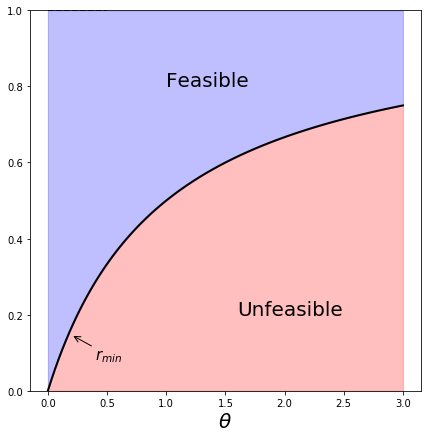

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def r_min(t):
    return(t / (t+ 1))

t = np.linspace(0.0,3.0,100)
fig = plt.figure(1,figsize=(7,7))
ax = fig.add_subplot(111,ylim = (0,1))
plt.xlabel(xlabel=r"$\theta$",fontsize=20)

ax.fill_between(t,r_min(t),0,alpha=0.25,color = "red")
ax.fill_between(t,r_min(t),1,alpha=0.25,color = "blue")

ax.annotate("Feasible",[1,0.8],fontsize=20)
ax.annotate("Unfeasible",[1.6,0.2],fontsize=20)
ax.annotate("$r_{min}$",[0.2,r_min(0.2)-0.02],[0.4,r_min(0.5)-0.25],arrowprops = dict(arrowstyle="->"),fontsize = 15)


ax.plot(t,r_min(t),color="black",lw=2)
ax.hlines(1,xmin = 0,xmax=0.5,linestyles="--")
plt.show()

Thus we can see that the lower bound of $r_{min}$ required to ensure feasability increases as we increase the interspecific interaction strength. The upper bound for $r_min$ remains constant at $1$. We can also rearange this relationship by multiplying the inequality by $(nC \bar{\alpha_{ij}}+\bar{\alpha_{ii}})$ giving:
\begin{align}
   r_{min}nC \bar{\alpha_{ij}}+r_{min}\bar{\alpha_{ii}} &> nC \bar{\alpha_{ij}} \\ \\
   \frac{r_{min} nC\bar{\alpha_{ij}}}{\alpha_{ii}} + \frac{r_{min}\bar{\alpha_{ii}}}{\bar{\alpha_{ii}}} &> \frac{nC \bar{\alpha_{ij}}}{\alpha_{ii}} \\ \\
   r_{min} \theta + r_{min} &> \theta \\ \\
   \theta  &< \frac{r_{min}}{1-r_{min}} \ \ \ \mbox{where} \ \theta = \frac{nC \bar{\alpha_{ij}}}{\alpha_{ii}}
\end{align}

We can also plot this inequality to get the upper bound on $\theta$:

Text(0.05, 0.8, 'Unfeasible')

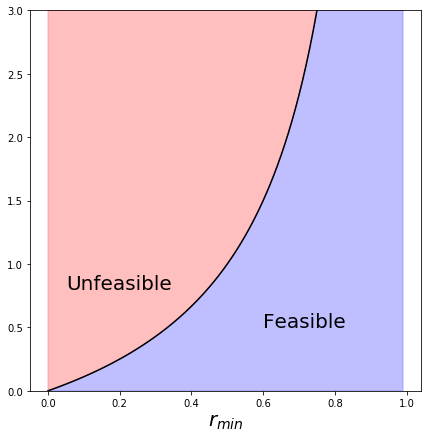

In [147]:
def theta(rmin):
    return(rmin / (1-rmin))

rmin = np.linspace(0,0.99,100)

fig = plt.figure(1,figsize=(7,7))
ax = fig.add_subplot(111,ylim = (0,3.0), xlabel=r"$r_{min}$")
plt.xlabel(xlabel=r"$r_{min}$",fontsize=20)

ax.plot(rmin,theta(rmin),color = "black")

ax.fill_between(rmin,theta(rmin),0,alpha=0.25,color = "blue")
ax.fill_between(rmin,theta(rmin),3.0,alpha=0.25,color = "red")

ax.annotate("Feasible",[0.6,0.5],fontsize=20)
ax.annotate("Unfeasible",[0.05,0.8],fontsize=20)


### Simulations

We can test these bounds using numerical simualtions at a set temperature. In theory the condidtion that $r_{min} > \frac{\theta}{\theta + 1}$ should be enough to ensure positive equilibrial biomasses. I did theses simualtions across a range of $r_{min}$ and $\theta$ by varying the average growth rate $\bar{r}$ and the strength of interspecific effects $\bar{\alpha_{ij}}$. Though the relationship between average growth and $r_min$ is not linear by sweeping across the range I was able to get a good coverage across the variable:

<img src="figures/simulations/feas_params.png" width = "700">

On the left here we have the predicted feasability (according to the inequality above) at each of these simulations with red representing unfeasible systems and blue feasible ones. We can see that this closely aligns with the simulated feasability obtained by numerical integration on the right:

<img src="figures/simulations/feas_sims.png" width = "700">

## Temperature Dependence

given that $nC \bar{\alpha_{ij}}$ and $\alpha_{ii}$ are both likely to be temperature dependent we can work out some of the expected relations of feasability to temperature. In the most simple model both these values can be simply described by boltzman kinetics:

\begin{align}
    \bar{\alpha_{ii}}(T_{diff}) &= \bar{\alpha_{ii}}_0 e^{-E_{\bar{\alpha_{ii}}}T_{diff}} \\
    \bar{\alpha_{ij}}(T_{diff}) &= \bar{\alpha_{ij}}_0 e^{-E_{\bar{\alpha_{ij}}}T_{diff}}
\end{align}

where $Tdiff$ is the boltzmann normalised difference from the reference temperature $\left(\frac{1}{kT}-\frac{1}{kT_{ref}}\right)$. Thus the $\theta$ parameter is simply the ratio of these two values giving:

\begin{align}
    \theta(T) =
    \frac{(nC\bar{\alpha_{ij}}(T_{diff}))}{ \bar{\alpha_{ii}}(T_{diff})} =
    \frac{nC\bar{\alpha_{ij}}_0 e^{-E_{\bar{\alpha_{ij}}}T_{diff}}}{\bar{\alpha_{ii}}_0 e^{-E_{\bar{\alpha_{ii}}}T_{diff}}}=
    \frac{nC\bar{\alpha_{ii}}_0}{\bar{\alpha_{ij}}_0} e^{-(E_{\bar{\alpha_{ij}}} - E_{\bar{\alpha_{ii}}})T_{diff}}
\end{align}

So the temperature dependence of this parameter is positive (increasing with $T$) if $E_{\bar{\alpha_{ij}}} > E_{\bar{\alpha_{ii}}}$ with the magnitude being determined by the difference. We can plot this as a function of temperature:

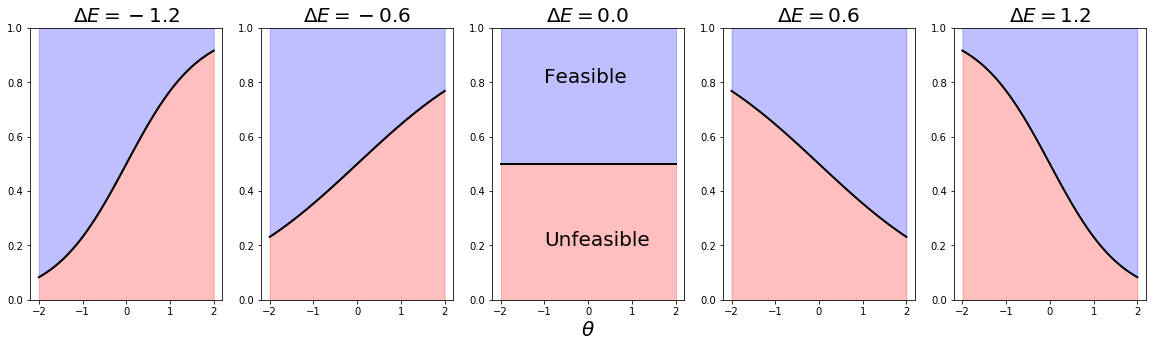

In [231]:
def r_min_Temp(Tdiff,Ediff):
    return( (np.exp(-(Ediff)*Tdiff)) / ((np.exp(-(Ediff)*Tdiff)) + 1) )

Tdiff = np.linspace(-2,2.0,100)
Ediff = np.linspace(-1.2,1.2,5)

fig = plt.figure(1,figsize=(20,5))
for i in range(0,5):
    plotn = 151 + (i)
    ax = fig.add_subplot(plotn,ylim = (0,1))

    ax.fill_between(Tdiff,r_min_Temp(Tdiff,Ediff[i]),0,alpha=0.25,color = "red")
    ax.fill_between(Tdiff,r_min_Temp(Tdiff,Ediff[i]),1,alpha=0.25,color = "blue")
    ax.plot(Tdiff,r_min_Temp(Tdiff,Ediff[i]),color="black",lw=2)
    ax.set_title(r'$\Delta E = %0.1f $' % Ediff[i],fontsize = 20)
    if i == 2:
        plt.xlabel(xlabel=r"$\theta$",fontsize=20)
        ax.annotate("Feasible",[-1,0.8],fontsize=20)
        ax.annotate("Unfeasible",[-1,0.2],fontsize=20)

So depending on the relative temperature sensitivities of the two processes the mininum growth rate required for feasability will change with temperature. If intraspecific interactions are more sensitive $\Delta E > 0$ the feasability bound falls with temperature and vice versa.

Text(0, 0.5, 'Y')

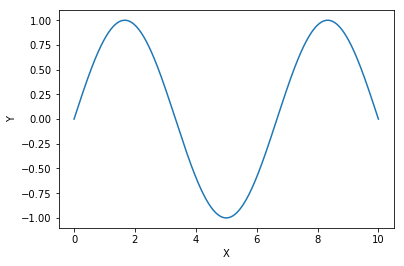

In [259]:
def f(x):
    return np.sin(x*0.3 * np.pi)
    
    
x = np.linspace(0,10,num=1000)
plt.plot(x,f(x))
plt.xlabel("X")
plt.ylabel("Y")

(array([136.,  60.,  50.,  44.,  43.,  87.,  88., 100., 120., 272.]),
 array([-0.99998887, -0.7999911 , -0.59999332, -0.39999555, -0.19999777,
         0.        ,  0.19999777,  0.39999555,  0.59999332,  0.7999911 ,
         0.99998887]),
 <a list of 10 Patch objects>)

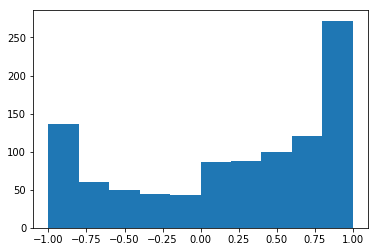

In [260]:
plt.hist(f(x))